# HTML Files with BeautifulSoup

In [ ]:
import requests
from bs4 import BeautifulSoup

soups=[]
online_articles_aquired=True

country_names = [
                 'Japan', 
                 'Italy', 
                 'South Africa', 
                 'United States', 
                 'Iran', 
                 'South Korea', 
                 'Spain', 
                 'France',
                 'Portugal',
                 'Singapore',
                 'China',   
                 'United Kingdom',
                 'Germany'
                ]


for country_name in country_names:
    article_html = requests.get('https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_' + country_name)
    if article_html is None:
        online_articles_aquired=False
        print("Failed to download wikipedia entry for country: " + country_name)
    else:
        soups.append(BeautifulSoup(article_html.text, 'html.parser'))
if online_articles_aquired:
    print("scrapped all wikipedia articles")

In [3]:
import os
if not online_articles_aquired:
    fileList=os.listdir('./data/html/')
    soups=[]
    for file in fileList:
        with open(os.path.join('./data/html/',file)) as f:

            soup=BeautifulSoup(f.read())
            soups.append(soup)

In [4]:
if online_articles_aquired:
    print(country_names)
else:
    print(fileList)

['2020 coronavirus pandemic in Japan - Wikipedia.html', '2020 coronavirus pandemic in South Africa - Wikipedia.html', '2020 coronavirus pandemic in the United States - Wikipedia.html', '2020 coronavirus pandemic in Italy - Wikipedia.html', '2020 coronavirus pandemic in Iran - Wikipedia.html', '2020 coronavirus pandemic in South Korea - Wikipedia.html', '2020 coronavirus pandemic in Spain - Wikipedia.html', '2020 coronavirus pandemic in the United Kingdom - Wikipedia.html']


How to find relevant text inside <"p"> elements

In [5]:
print((soups[0].find_all('p')[7]).text)

On 11 February, two evacuees from Wuhan tested positive after an earlier test returned negative results.[18] Another three cases were confirmed over the next two days, bringing the total count to 31.[19]



Get current corona cases

In [93]:
import pandas as pd

corona_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', error_bad_lines=False)
corona_dead = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv', error_bad_lines=False)
corona_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv', error_bad_lines=False)

In [94]:
corona_confirmed = corona_confirmed.rename({'Country/Region': 'Country'}, axis=1)
corona_dead = corona_dead.rename({'Country/Region': 'Country'}, axis=1)
corona_recovered = corona_recovered.rename({'Country/Region': 'Country'}, axis=1)
#corona_confirmed[corona_confirmed.Country == "Germany"].loc[:,"1/22/20"]

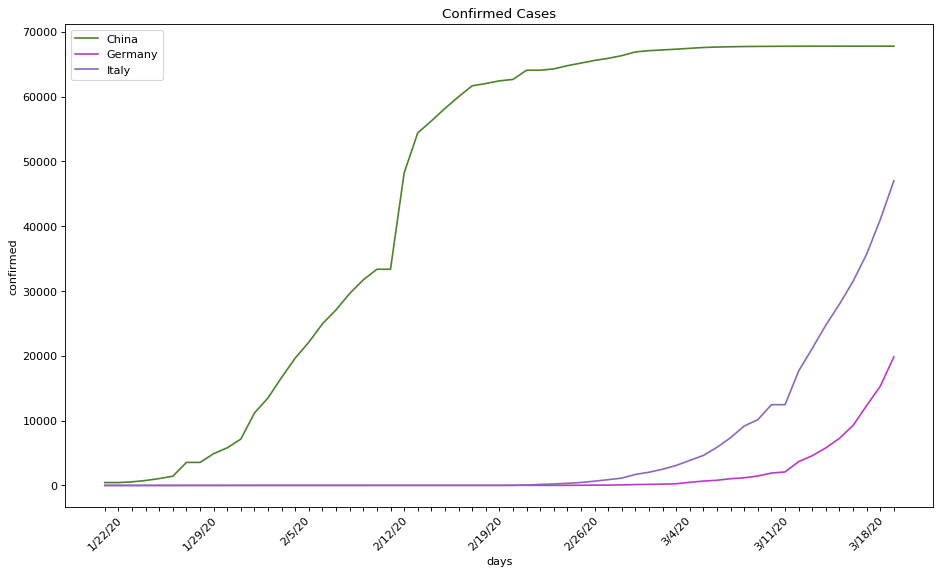

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

def plot_test(countries, data):


    fig = plt.figure(figsize=(14, 8), dpi= 80)


    ax = fig.add_subplot(111)
    ax.xaxis.set_tick_params(rotation=45)
    x_points = data.columns.values.tolist()[4:]

    for c in countries:
        y_points = data[data.Country == c].values.tolist()[0][4:]
        p = ax.plot(x_points, y_points, 'b',c=numpy.random.rand(3,),label=c)

    ax.set_xlabel('days')
    ax.set_ylabel('confirmed')
    ax.set_title('Confirmed Cases')
    plt.legend(loc="upper left")

    every_nth = 7
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
            
plot_test(["China","Germany","Italy"],corona_confirmed)

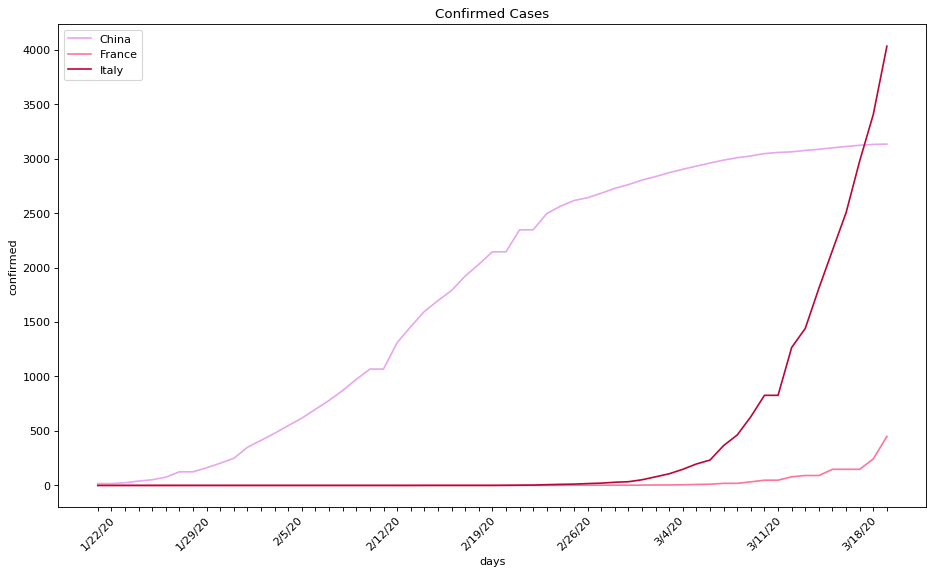

In [103]:
plot_test(["China","France","Italy"],corona_dead)

# Spacy for Natural Language Processing

In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [7]:
#all docs for italy soup
docList=[]
for p in soups[4].find_all('p'):
    docList.append(nlp(p.text))

In [8]:
#create single doc for test purpose
doc=docList[3]

Print of all paragraph inside the html, skip if boring

In [9]:
for doc in docList:
    print(doc)



During the 2019–20 coronavirus pandemic, Iran reported its first confirmed cases of SARS-CoV-2 infections on 19 February 2020 in Qom.[3] As of 17 March 2020[update], according to Iranian health authorities, there had been 988 COVID-19 deaths in Iran with more than 16,000 confirmed infections.[4][5][6] As of 20 March 2020, Iran has the third highest number of COVID-19 deaths after China and Italy, the highest in Western Asia and the fourth-highest number of SARS-CoV-2 cases, surpassed only by Mainland China, Italy, and Spain.

Some non-Iranian-government sources estimates of the numbers of SARS-CoV-2 infections and COVID-19 deaths are much higher than official values.[7][8][9] The Iranian government has also been accused of coverups, censorship and mismanagement.[10][11][12][13] However, the World Health Organisation says that it has not seen problems with Iran's reported figures.[14]

Multiple Iranian government ministers and senior officials have been diagnosed SARS-CoV-2 positive, 

The Entity-Recognition from Spacy works bad for dates, it does somewhat work for GeoPoliticalEntities:

In [10]:
for token in doc:
    if token.ent_type_ != None:
        print(token,token.ent_type_)

The 
UN ORG
’s 
Children ORG
Fund ORG
( 
UNICEF ORG
) 
has 
flown 
aid 
into 
Iran GPE
. 
In 
late DATE
February DATE
, 
the 
first ORDINAL
cargo 
plane 
with 
Personal ORG
Protective ORG
Equipment ORG
( 
PPE ORG
) 
arrived 
, 
another 
on 
March DATE
3rd DATE
and 
a 
third 
aircraft 
on 
March DATE
16th DATE
. 
On 
March DATE
3rd DATE
, 
the GPE
United GPE
Arab GPE
Emirates GPE
sent 
an 
aircraft 
with 
medical 
supplies 
and 
five CARDINAL
WHO 
experts 
. 
Uzbekistan GPE
sent 
a 
plane 
on 
March DATE
16th.[218 DATE
] 

 


# Date Matcher for each month

In [27]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [28]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

pattern = [ {"IS_DIGIT":True,'OP': '?'},{"TEXT": "January"},{"IS_DIGIT":True,'OP': '?'}]
pattern2 = [ {"IS_DIGIT":True,'OP': '?'},{"TEXT": "February"},{"IS_DIGIT":True,'OP': '?'}]
pattern3 = [ {"IS_DIGIT":True,'OP': '?'},{"TEXT": "March"},{"IS_DIGIT":True,'OP': '?'}]

matcher.add("JAN", None, pattern)
matcher.add("FEB", None, pattern2)
matcher.add("MARCH", None, pattern3)

In [29]:
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['February', 'March', 'March', 'March', 'March']


print of all matches, skip if boring

In [30]:
for doc in docList:
    matches = matcher(doc)
    print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: []
Matches: ['19 February', '19 February 2020', 'February', 'February 2020', 'March', '20 March', '20 March 2020', 'March', 'March 2020']
Matches: []
Matches: ['3 March', 'March']
Matches: []
Matches: []
Matches: []
Matches: []
Matches: []
Matches: ['22 February', '22 February 2020', 'February', 'February 2020']
Matches: ['26 February', '26 February 2020', 'February', 'February 2020']
Matches: ['20 February', 'February', '27 February', 'February']
Matches: []
Matches: ['26 February', 'February']
Matches: []
Matches: ['2 March', '2 March 2020', 'March', 'March 2020']
Matches: ['5 March', '5 March 2020', 'March', 'March 2020', '20 March', '20 March 2020', 'March', 'March 2020']
Matches: ['9 March', '9 March 2020', 'March', 'March 2020', '17 March', 'March']
Matches: ['13 March', '13 March 2020', 'March', 'March 2020', '10 March', 'March']
Matches: []
Matches: ['16 March', '16 March 2020', 'March', 'March 2020']
Matches: ['17 March', 'March']
Matches: ['20 February', 'February', 

In [31]:
SentList=[]
for doc in docList:
    matches = matcher(doc)
    for match_id, start, end in matches:
        #print(doc[start].sent,'\n')
        if doc[start].sent not in SentList:
            SentList.append(doc[start].sent)

all matched sentences. Must be further filtered, there are only a few sentences about actual responses, many about patients and deaths

In [32]:
for sent in SentList:
    print(sent,'\n')

During the 2019–20 coronavirus pandemic, Iran reported its first confirmed cases of SARS-CoV-2 infections on 19 February 2020 in Qom.[3] 

As of 17 March 2020[update], according to Iranian health authorities, there had been 988 COVID-19 deaths in Iran with more than 16,000 confirmed infections.[4][5][6] 

As of 20 March 2020, Iran has the third highest number of COVID-19 deaths after China and Italy, the highest in Western Asia and the fourth-highest number of SARS-CoV-2 cases, surpassed only by Mainland China, Italy, and Spain.
 

23 members of the Iranian Parliament, around 8% of all MPs, were reported to have been infected by 3 March 2020.[20] 

On 22 February 2020, the Ministry of Islamic Culture and Guidance, announced the cancellation of all concerts and other cultural events for one 

President Rouhani, however, said on 26 February 2020 that there are no plans to quarantine areas affected by the outbreak, and only individuals would be quarantined.[115] 

On 20 February, accordin